# Background
Scientists define there to be two main types of age: chronological, and biological age. Chronological age is based on how long you have been alive (years since birth), whereas biological age is a rough estimate of how healthy your body is by measuring various different biomarkers. For more information on this, check out my recent article on biological age right here: [What is Biological Age?](https://medium.com/biotein/what-is-biological-age-383692f53e60)

One way of determining biological age (as also described in the article) is to measure the methylation levels in your genome. At sites known as CpG sites, along your DNA, various proteins can add on or remove methyl groups, in order to control which genes are expressed into proteins, and which ones aren't. As you age, however, the systems responsible for maintaining this control of the genome begin to break down, leading to errors in methylation. As such, some sites begin to see an accumulation of methyl tags, while others have their tags removed, as you age.

Dr. Steve Horvath, longevity researcher at University o California Los Angeles, used this progression to develop a system known as the Horvath aging clock, which is able to produce an accurate estimate of your biological age. For example, after analyzing the methylation levels in a sample of your cells, the clock might tell you that your biological age is around 30, which basically means that your methylation levels (and your body's health) is similar to the average 30-year-old. If your actual age is somewhere around 40, this means you are living a healthy life, whereas if you are only 20 years old, then this suggests that you are living an unhealthy life. This information thus equips people with the knowledge to take control of their lifestyle and live a healthy life.

# Brief Explanation of This Project
In this project, I aim to somewhat replicate the epigenetic clock developed by Horvath, using methylation data taken from blood samples to predict an individual's age.

In [1]:
# Imports
import pandas as pd
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading methylation dataset
path = "C:/Users/aadid/Documents/Extra/R_Code/Epigenetic Clock/Methylation_Dataset.csv"
df = pd.read_csv(path)
df.head()

,...1,cg09809672,cg22736354,cg02228185,cg01820374,cg06493994,cg19761273,gender,age
0,GSM507152,0.392464,0.281630,0.352591,0.315924,0.111604,0.211683,1,71.06
1,GSM507153,0.377919,0.238900,0.520396,0.323641,0.127965,0.184307,1,69.65
2,GSM507154,0.458522,0.204078,0.519273,0.363714,0.119891,0.215067,1,65.79
3,GSM507155,0.479108,0.154893,0.618859,0.493972,0.088941,0.240057,1,49.39
4,GSM507156,0.418763,0.217832,0.561005,0.398580,0.085992,0.207462,1,60.68


In [3]:
# Shuffle dataframe to randomize data order, possibly preventing confounding factors
df = shuffle(df)
df.reset_index(inplace=True, drop=True)
df = df.rename(columns={'...1':'patient_id'})
df = df.drop(['patient_id'], axis=1)
df = df.dropna()

def oneHotEncode(df, colNames):
  for col in colNames:
    if (df[col].dtype == np.dtype('object')):
      dummies = pd.get_dummies(df[col],prefix=col)
      df = pd.concat([df,dummies],axis=1)
      #drop the encoded column
      df.drop([col],axis = 1 , inplace=True)
    return df

df = oneHotEncode(df, df.columns)

df.head()

,cg09809672,cg22736354,cg02228185,cg01820374,cg06493994,cg19761273,gender,age
0,0.370513,-2.679426,1.071757,-0.419631,-3.386605,-1.288155,1,31.000000
1,0.765490,0.088040,0.704960,0.536780,0.048230,0.324100,0,4.333333
2,0.654020,0.073570,0.696060,0.414720,0.058600,0.339130,0,6.750000
3,0.880000,0.018600,0.801000,0.902000,0.017700,0.386000,1,0.000000
4,0.558180,0.113090,0.712590,0.520650,0.037370,0.293700,0,12.166667


In [5]:
np.where(pd.isnull(df))


(array([], dtype=int64), array([], dtype=int64))

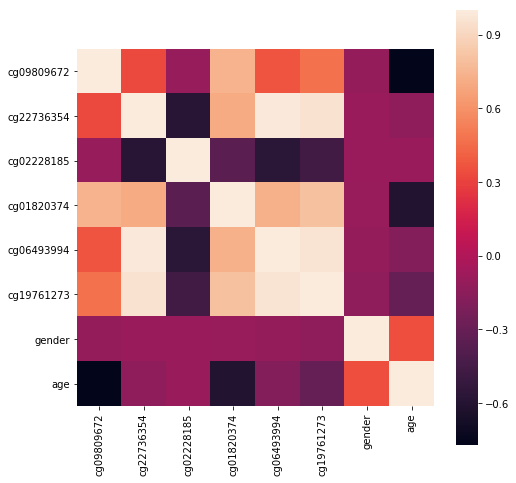

In [4]:
import seaborn as sb
C_mat = df.corr()
fig = plt.figure(figsize = (8,8))

sb.heatmap(C_mat, vmax=1, square=True)
plt.show()

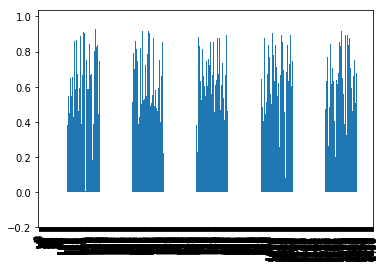

In [7]:
df['cg09809672'].plot(kind='bar')

In [8]:
X = df[['cg09809672', 'cg22736354', 'cg02228185',	'cg01820374',	'cg06493994',	'cg19761273', 'gender']]
std_scaler = StandardScaler()
std_scaler

X_std = pd.DataFrame(std_scaler.fit_transform(X), columns=X.columns)

C:\Users\aadid\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\aadid\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [9]:
y = df['age']

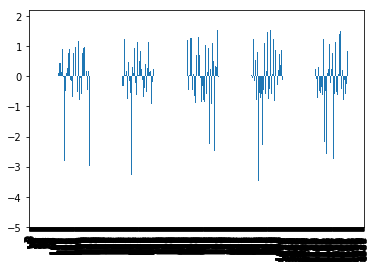

In [10]:
X_std['cg01820374'].plot(kind='bar')

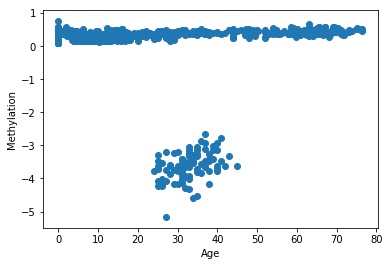

In [11]:
import matplotlib.pyplot as plt

plt.scatter(df['age'], X_std['cg22736354'])
plt.xlabel('Age')
plt.ylabel('Methylation')
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [13]:
y_test.head()

972      8.416667
1148    10.916667
1351    26.000000
324      6.833333
258     11.666667
Name: age, dtype: float64

In [14]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
print(regr.score(X_test, y_test))

0.7289873359837876


In [16]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 15, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [17]:
print(regressor.score(X_test, y_test))

0.9270875542076957


In [18]:
predictions = regressor.predict(X_test)
for i in range(0, 10):
  print("Prediction:", predictions[i],"    Actual:", y_test.iloc[i])

Prediction: 12.477777777066667     Actual: 8.416666667000001
Prediction: 5.861111111066667     Actual: 10.91666667
Prediction: 29.866666666666667     Actual: 26.0
Prediction: 7.922222222866667     Actual: 6.833333333
Prediction: 11.416666667066664     Actual: 11.66666667
Prediction: 11.4722222222     Actual: 6.666666667
Prediction: 65.58384933333333     Actual: 75.09651
Prediction: 8.422222221933334     Actual: 9.166666667000001
Prediction: 11.155555554933335     Actual: 8.333333332999999
Prediction: 11.205555555400002     Actual: 8.916666667000001


In [31]:
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten


NN_model = Sequential()

# Input layer
NN_model.add(Dense(128, kernel_initializer='normal', input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))

# Output layer
NN_model.add(Dense(1, kernel_initializer='normal', activation='linear'))


# Compile NN
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error', 'accuracy'])
NN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               1024      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 165,889
Trainable params: 165,889
Non-trainable params: 0
_________________________________________________________________


In [32]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [33]:
history = NN_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Train on 714 samples, validate on 179 samples
Epoch 1/100
714/714 [==============================] - 0s 494us/step - loss: 15.4959 - mean_absolute_error: 15.4959 - accuracy: 0.1359 - val_loss: 15.8257 - val_mean_absolute_error: 15.8257 - val_accuracy: 0.0112

Epoch 00001: val_loss improved from inf to 15.82573, saving model to Weights-001--15.82573.hdf5
Epoch 2/100
714/714 [==============================] - 0s 113us/step - loss: 12.7301 - mean_absolute_error: 12.7301 - accuracy: 0.0084 - val_loss: 15.2151 - val_mean_absolute_error: 15.2151 - val_accuracy: 0.0112

Epoch 00002: val_loss improved from 15.82573 to 15.21509, saving model to Weights-002--15.21509.hdf5
Epoch 3/100
714/714 [==============================] - 0s 105us/step - loss: 10.5295 - mean_absolute_error: 10.5295 - accuracy: 0.0252 - val_loss: 10.6771 - val_mean_absolute_error: 10.6771 - val_accuracy: 0.1341

Epoch 00003: val_loss improved from 15.21509 to 10.67710, saving model to Weights-003--10.67710.hdf5
Epoch 4/100
71

714/714 [==============================] - 0s 113us/step - loss: 3.1066 - mean_absolute_error: 3.1066 - accuracy: 0.3207 - val_loss: 4.1797 - val_mean_absolute_error: 4.1797 - val_accuracy: 0.3073

Epoch 00030: val_loss improved from 4.24040 to 4.17967, saving model to Weights-030--4.17967.hdf5
Epoch 31/100
714/714 [==============================] - 0s 140us/step - loss: 3.0296 - mean_absolute_error: 3.0296 - accuracy: 0.3207 - val_loss: 4.3500 - val_mean_absolute_error: 4.3500 - val_accuracy: 0.2961

Epoch 00031: val_loss did not improve from 4.17967
Epoch 32/100
714/714 [==============================] - 0s 120us/step - loss: 3.1691 - mean_absolute_error: 3.1691 - accuracy: 0.3263 - val_loss: 4.4003 - val_mean_absolute_error: 4.4003 - val_accuracy: 0.2682

Epoch 00032: val_loss did not improve from 4.17967
Epoch 33/100
714/714 [==============================] - 0s 103us/step - loss: 3.2186 - mean_absolute_error: 3.2186 - accuracy: 0.3165 - val_loss: 4.1477 - val_mean_absolute_error: 

714/714 [==============================] - 0s 115us/step - loss: 2.9772 - mean_absolute_error: 2.9772 - accuracy: 0.3249 - val_loss: 4.1087 - val_mean_absolute_error: 4.1087 - val_accuracy: 0.3352

Epoch 00060: val_loss did not improve from 4.04127
Epoch 61/100
714/714 [==============================] - 0s 108us/step - loss: 2.9104 - mean_absolute_error: 2.9104 - accuracy: 0.3305 - val_loss: 4.0831 - val_mean_absolute_error: 4.0831 - val_accuracy: 0.3352

Epoch 00061: val_loss did not improve from 4.04127
Epoch 62/100
714/714 [==============================] - 0s 109us/step - loss: 2.7919 - mean_absolute_error: 2.7919 - accuracy: 0.3277 - val_loss: 4.0626 - val_mean_absolute_error: 4.0626 - val_accuracy: 0.3128

Epoch 00062: val_loss did not improve from 4.04127
Epoch 63/100
714/714 [==============================] - 0s 115us/step - loss: 2.7518 - mean_absolute_error: 2.7518 - accuracy: 0.3291 - val_loss: 4.0334 - val_mean_absolute_error: 4.0334 - val_accuracy: 0.3296

Epoch 00063: val

714/714 [==============================] - 0s 92us/step - loss: 2.6862 - mean_absolute_error: 2.6862 - accuracy: 0.3207 - val_loss: 4.0262 - val_mean_absolute_error: 4.0262 - val_accuracy: 0.2905

Epoch 00090: val_loss did not improve from 3.86939
Epoch 91/100
714/714 [==============================] - 0s 95us/step - loss: 2.6215 - mean_absolute_error: 2.6215 - accuracy: 0.3319 - val_loss: 4.0233 - val_mean_absolute_error: 4.0233 - val_accuracy: 0.3184

Epoch 00091: val_loss did not improve from 3.86939
Epoch 92/100
714/714 [==============================] - 0s 103us/step - loss: 3.0346 - mean_absolute_error: 3.0346 - accuracy: 0.3207 - val_loss: 4.0921 - val_mean_absolute_error: 4.0921 - val_accuracy: 0.3464

Epoch 00092: val_loss did not improve from 3.86939
Epoch 93/100
714/714 [==============================] - 0s 96us/step - loss: 2.7227 - mean_absolute_error: 2.7227 - accuracy: 0.3291 - val_loss: 4.2245 - val_mean_absolute_error: 4.2245 - val_accuracy: 0.3296

Epoch 00093: val_lo

In [34]:
print(history.history.keys())

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_accuracy', 'loss', 'mean_absolute_error', 'accuracy'])


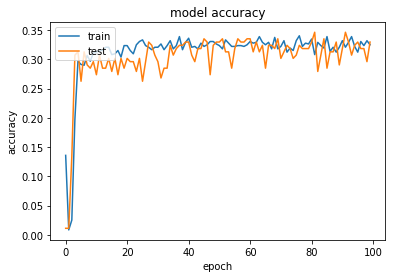

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

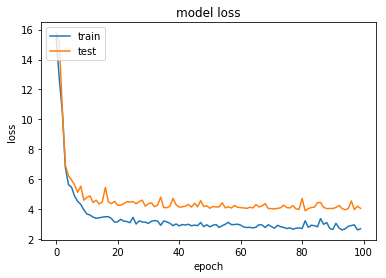

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
evaluation = NN_model.evaluate(X_test, y_test, batch_size=32)
loss = evaluation[0]
acc = evaluation[2]
print("Test loss:", loss)
print("Test accuracy:", acc)

441/441 [==============================] - 0s 36us/step
Test loss: 3.0985293880341547
Test accuracy: 0.29931971430778503
